# Data Scintist Project Seattle AirBNB Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from decimal import *
%matplotlib inline

#upload CSV files
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')
#show calendar data
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
#show Listings data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# show reviews data
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Understanding Data sets

In [4]:
# get all info about listings
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
# get all info about reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [6]:
# get all info about calendar
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
# check the number of rows in listings
row = listings.shape[0]
# check the number of columns in listings
column = listings.shape[1]
print("In Listings we have Rows: " , row , " and Column: " , column )


In Listings we have Rows:  3818  and Column:  92


In [8]:
# check the number of rows in reviews
row = reviews.shape[0]
# check the number of columns in reviews
column = reviews.shape[1]
print("In reviews we have Rows: " , row , " and Column: " , column )

In reviews we have Rows:  84849  and Column:  6


In [9]:
# check the number of rows in calendar
row = calendar.shape[0]
# check the number of columns in calendar
column = calendar.shape[1]
print("In calendar we have Rows: " , row , " and Column: " , column )

In calendar we have Rows:  1393570  and Column:  4


In [10]:
#check the columns in listings with no null values 
no_nulls = list(listings.columns[listings.isnull().mean() ==0])
print(no_nulls)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']


In [11]:
#check the number of null values in each column.
np.sum(listings.isnull())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [12]:
#check the column with 100% null values 
column_with_all_nulls = list(listings.columns[listings.isnull().mean() == 1])
print(column_with_all_nulls)

['license']


# Q1 Which properties is the most used in Seattle Airbnb? 

In [13]:
#check How many property and the Persentage of property in AirBnb 
count = listings.reset_index().groupby(['property_type']).size().to_frame('count_of_values')
Total = count['count_of_values'].sum()
count['percentage'] = round (count['count_of_values'].div(Total).mul(100) , 2 )
print(count)

                 count_of_values  percentage
property_type                               
Apartment                   1708       44.75
Bed & Breakfast               37        0.97
Boat                           8        0.21
Bungalow                      13        0.34
Cabin                         21        0.55
Camper/RV                     13        0.34
Chalet                         2        0.05
Condominium                   91        2.38
Dorm                           2        0.05
House                       1733       45.40
Loft                          40        1.05
Other                         22        0.58
Tent                           5        0.13
Townhouse                    118        3.09
Treehouse                      3        0.08
Yurt                           1        0.03


In [14]:
#declere method to displays a bar chart with a title
def display_bar_chart(df, column, title):
    vals = df[column].value_counts()
    plt.figure(figsize=(16, 8));
    (vals[:16]).plot(kind="bar", color=[ 'Aqua' , 'Orange', 'red', 'green', 'blue', 'cyan'] ,edgecolor='blue' );
    plt.title(title , color='black', size = 12, weight = 'bold'); 

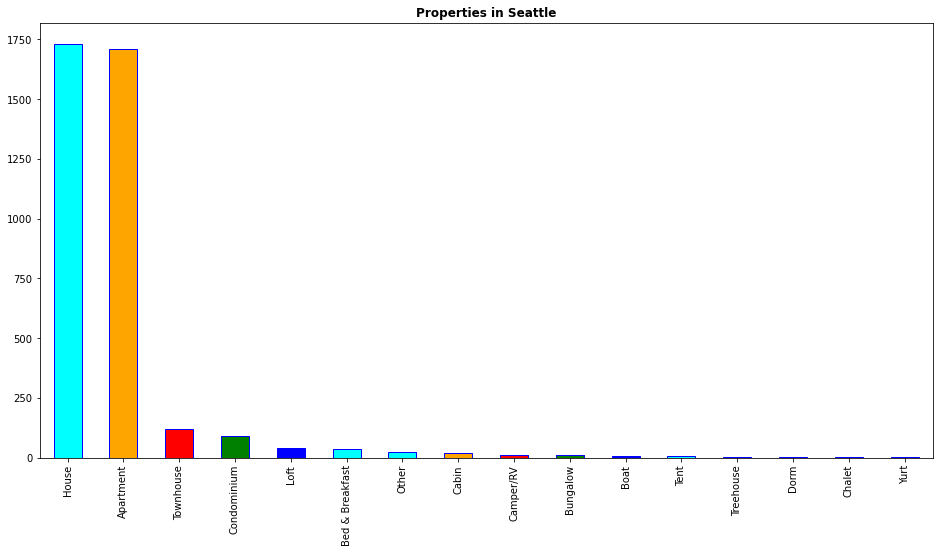

In [15]:
#Display how many  property for each Properties in Seattle"
display_bar_chart(listings, "property_type", "Properties in Seattle")

# Q2 What is the relation between price and property type?

In [23]:
# convert Price to start anlisys it
listings['price'] = listings['price'].apply(lambda x: x.replace('$','').replace(',', '').replace('.00', '')).astype(np.float64)


In [24]:
listings['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

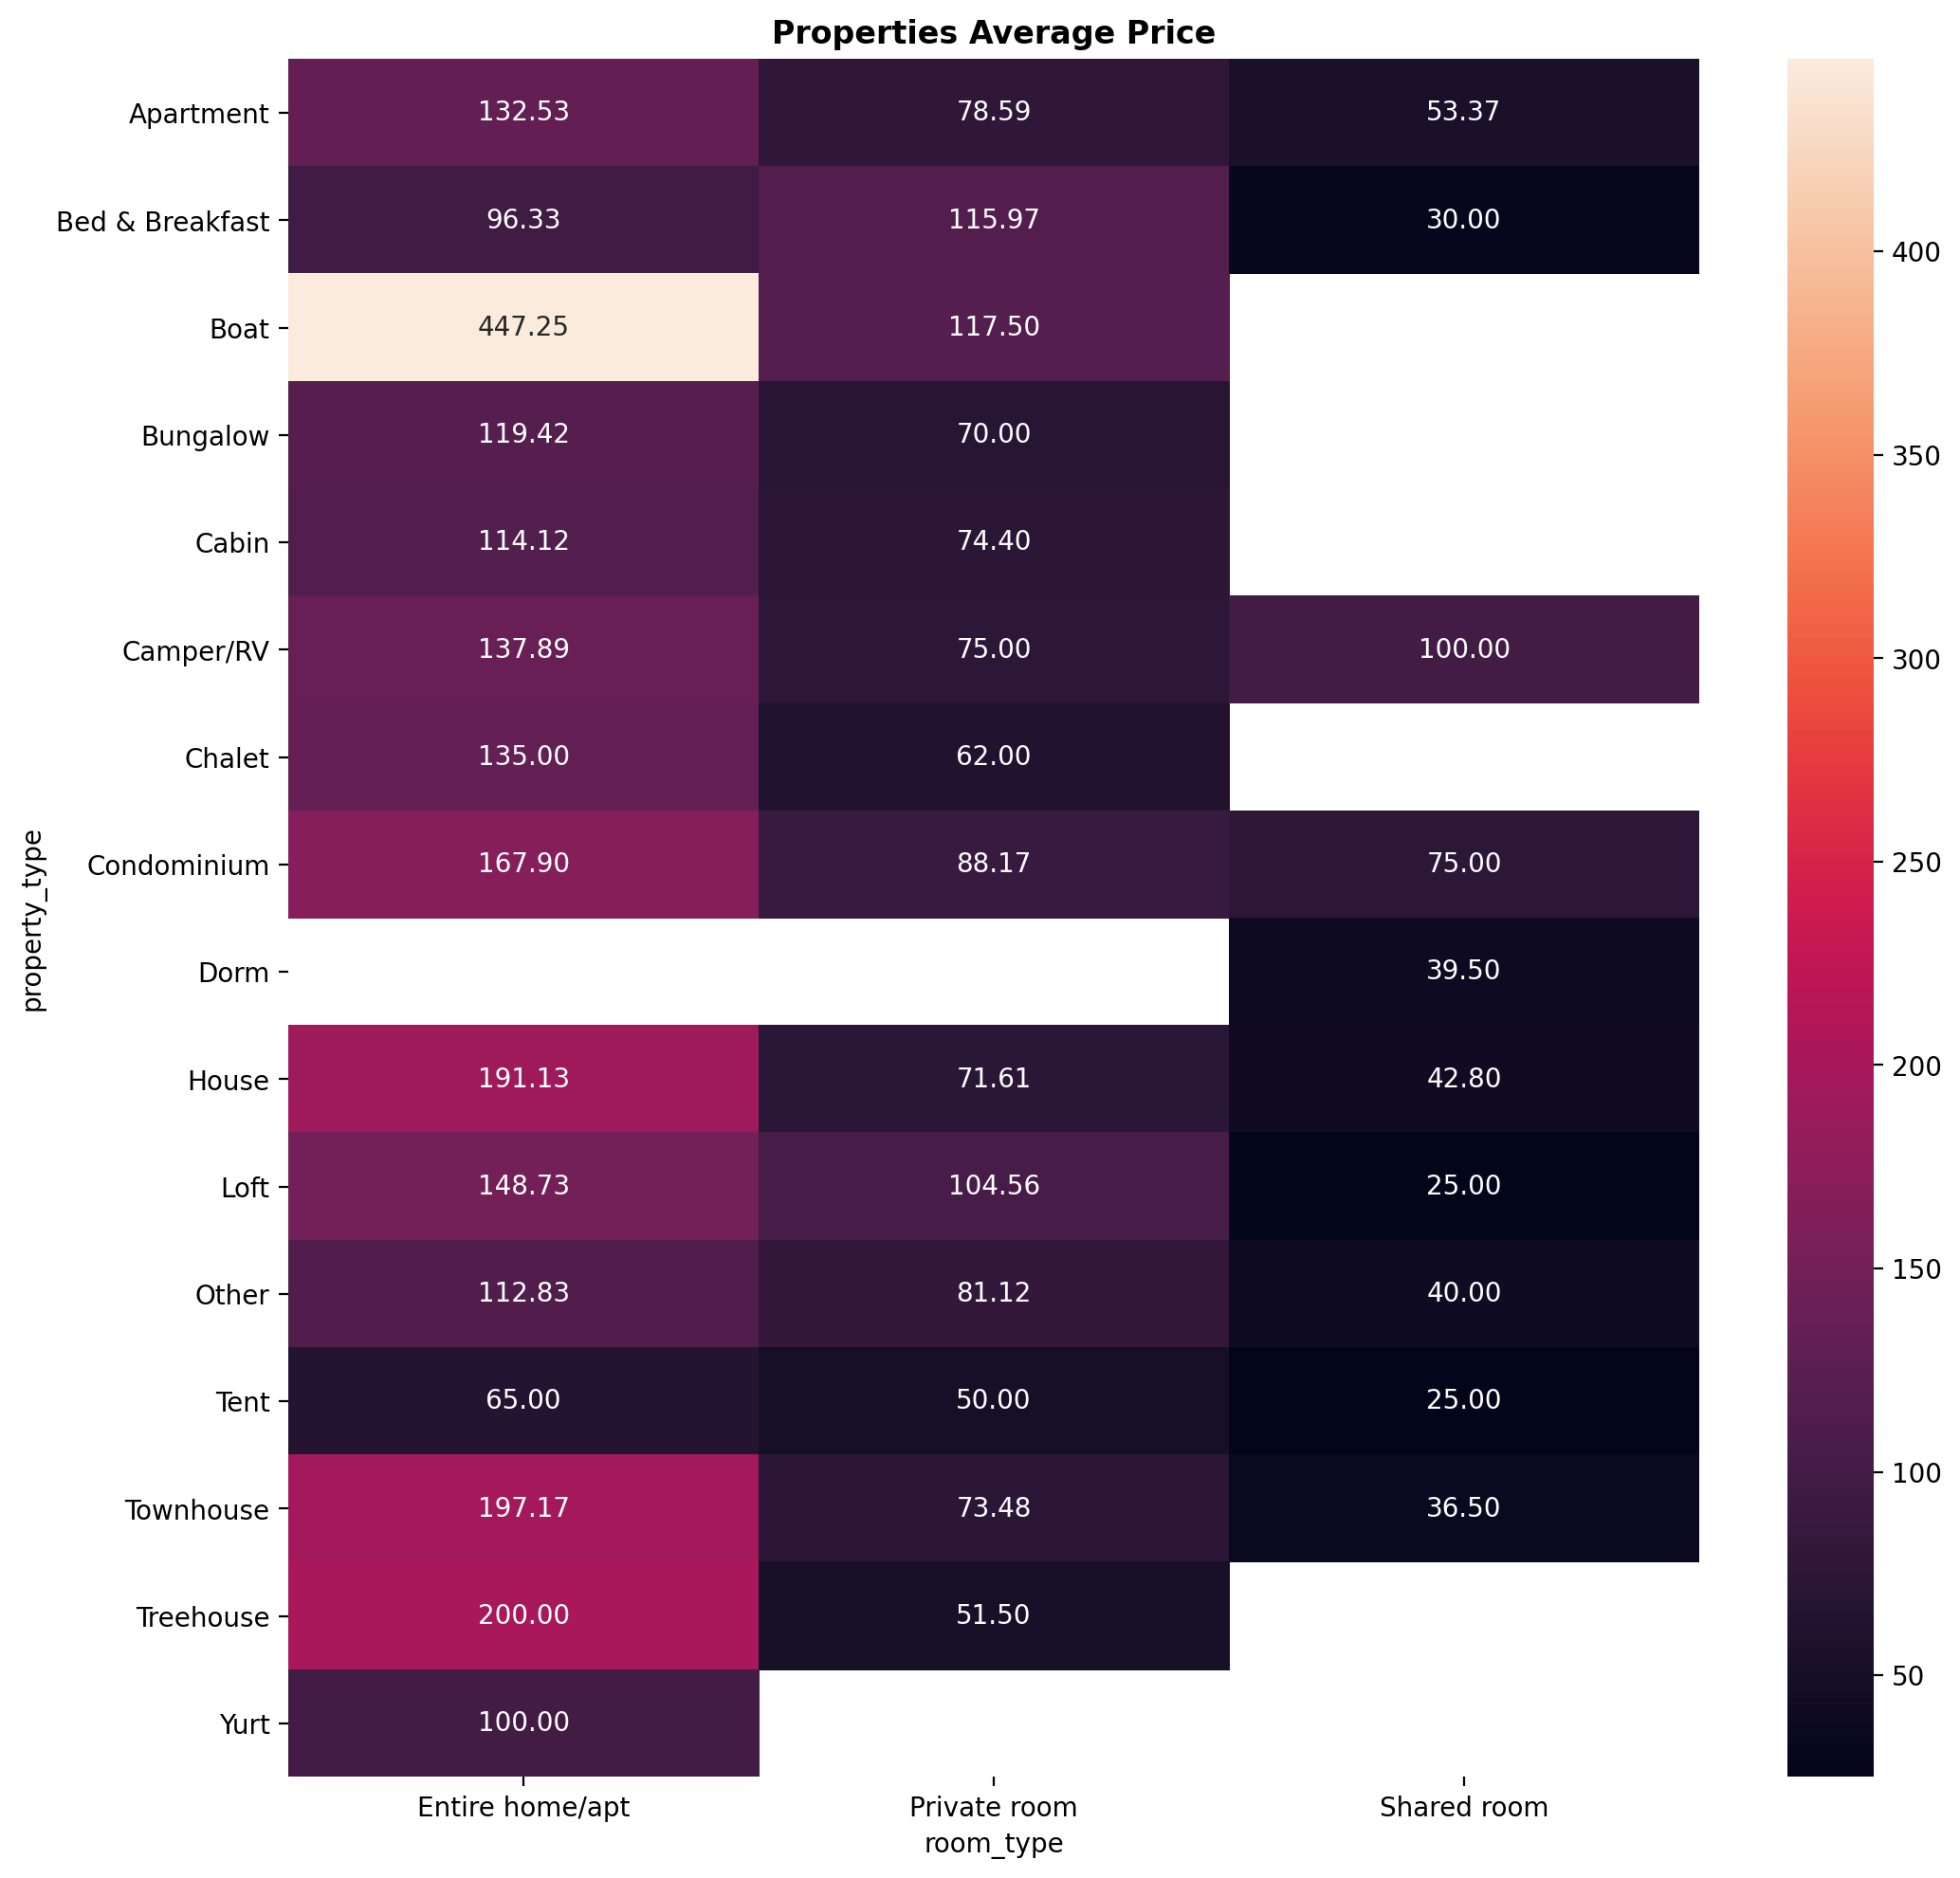

In [30]:
plt.figure(figsize=(12,12), dpi=200)
plt.title('Properties Average Price', weight ='bold', size = 12);
plt.xlabel('Room Type')
plt.ylabel('Property Type')
df_m =listings.groupby(['property_type','room_type']).price.mean().unstack()
sns.heatmap(df_m , annot=True, fmt='.2f')
plt.show()

# Q3 What is the common Response Rate of the hosts?

In [17]:
#check the hosts with 100% response rate 

pd.DataFrame(listings.query("host_response_rate == '100%' ").groupby(['host_name', 'host_response_time']).mean()['host_listings_count'])




host_listings_count
host_name        host_response_time                     
Abby             within a day                        1.0
                 within a few hours                  1.0
Abe              within a few hours                  1.0
Abigail          within a few hours                  1.0
Abigail & Justin within an hour                      1.0
...                                                  ...
Yvonne           within a day                        1.0
Zachary          within a day                        1.0
                 within a few hours                  1.0
                 within an hour                      1.0
Zachary & Angela within an hour                      1.0

[1316 rows x 1 columns]

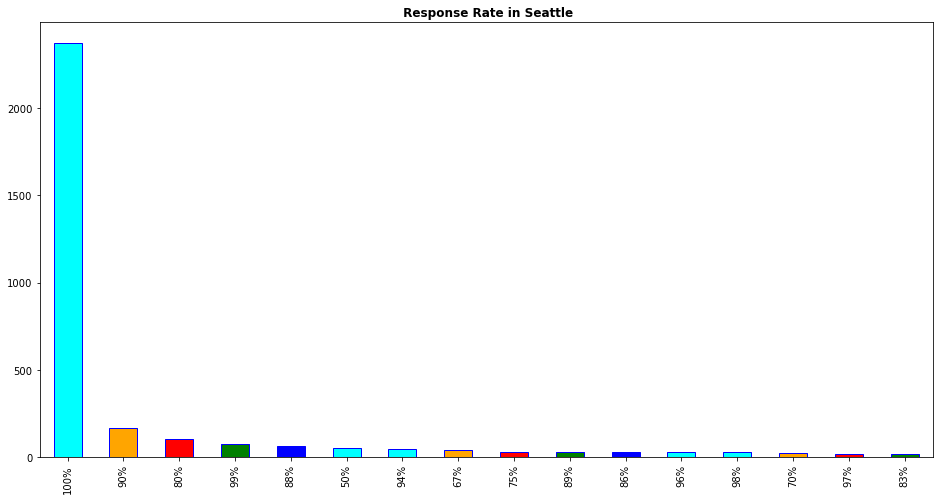

In [18]:
#Provide counts of host for each response_rate
display_bar_chart(listings, "host_response_rate", " Response Rate in Seattle")

# Q4 hat is the common properties host locations in Seattle Airbnb?

In [19]:
#Provide counts of host for each host_location
listings['host_location'].value_counts()

Seattle, Washington, United States        3259
US                                         246
Spokane, Washington, United States          41
Kent, Washington, United States             34
Los Angeles, California, United States      13
                                          ... 
New Orleans, Louisiana, United States        1
Oakland, California, United States           1
Addison, Texas, United States                1
Gosnold, Massachusetts, United States        1
Quilcene, Washington, United States          1
Name: host_location, Length: 120, dtype: int64

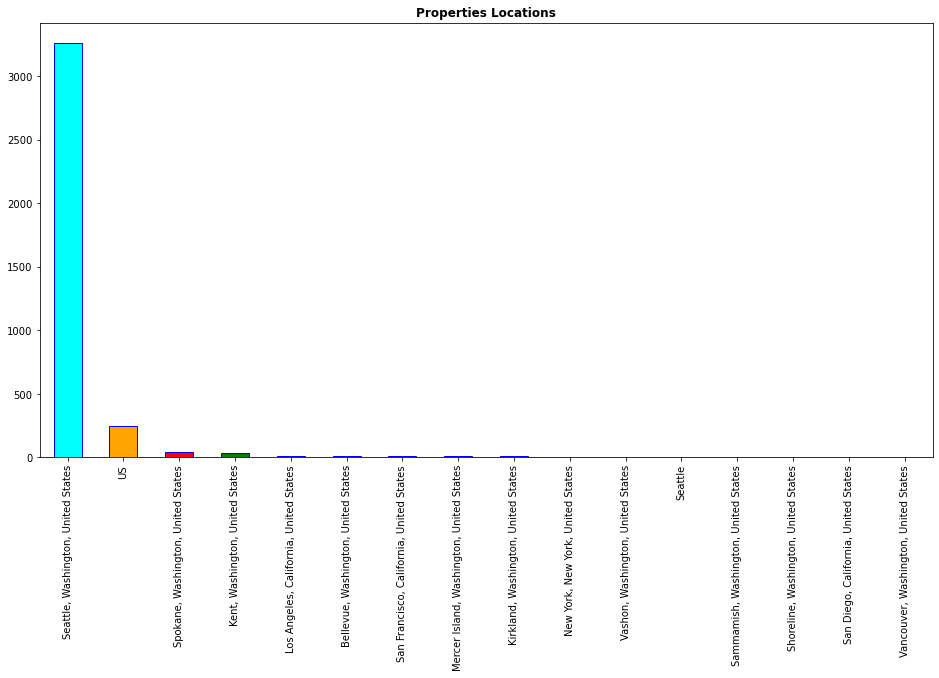

In [20]:
#Provide counts of host for each host_location in chart
display_bar_chart(listings, "host_location" , "Properties Locations")

In [21]:
#Provide counts of values for each city in Seattle
listings['city'].value_counts()


Seattle                  3810
West Seattle                2
Seattle                     2
西雅图                         1
seattle                     1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22270 missing from curre

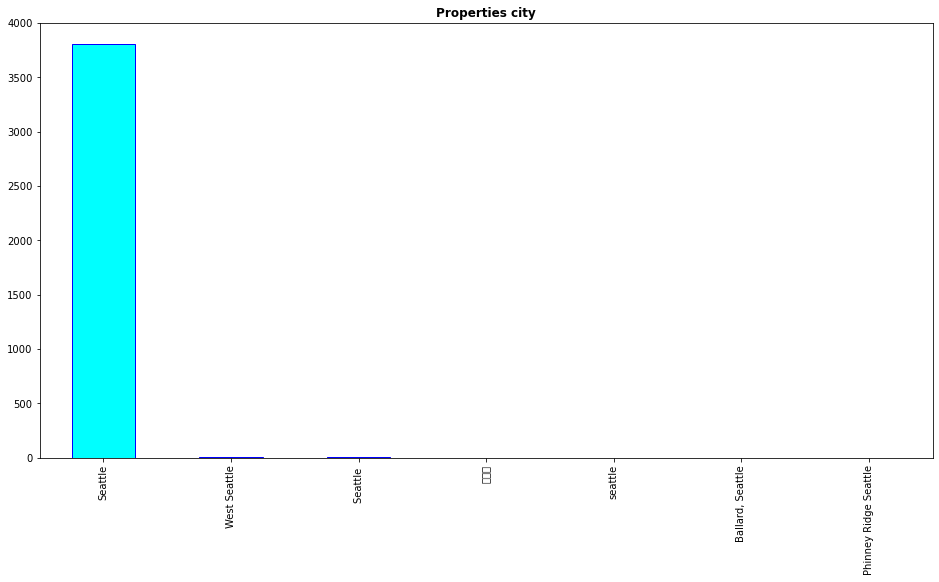

In [22]:
#Provide counts of values for each city in Seattle in chart
display_bar_chart(listings, "city" , "Properties city")

# Q4 Most common price listings for AirBnb? 

# Q4 Most common price listings for AirBnb? 

In [26]:
#Display price charts
def display_price_chart(df,column, title):
    plt.figure(figsize=(16, 8));
    df[column].hist(bins = 20);
    plt.title(title, size = 16, weight = 'bold', color='black');
    plt.ylabel('Count of AirBnbs', weight = 'bold', size = 12, color='black');
    plt.xlabel('Price', weight = 'bold', size= 10, color='black');

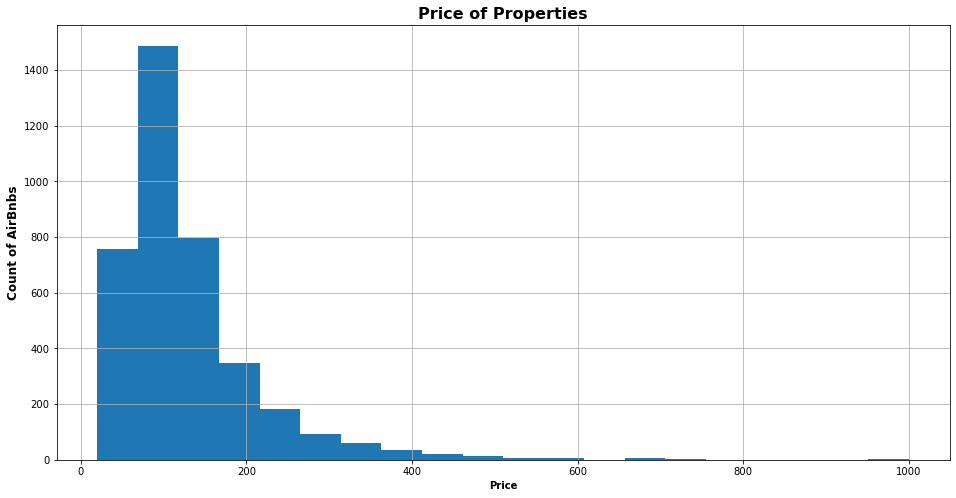

In [27]:
#Provide counts of values for each price in Seattle in chart
display_price_chart(listings,'price','Price of Properties')

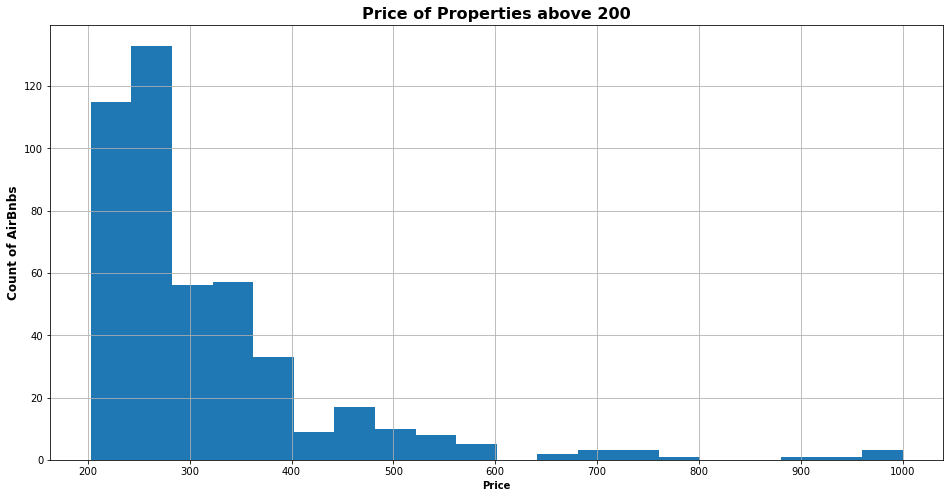

In [28]:
# breakdown to check the listings above 200 dollars
display_price_chart(listings[listings['price'] > 200],'price' ,'Price of Properties above 200' )


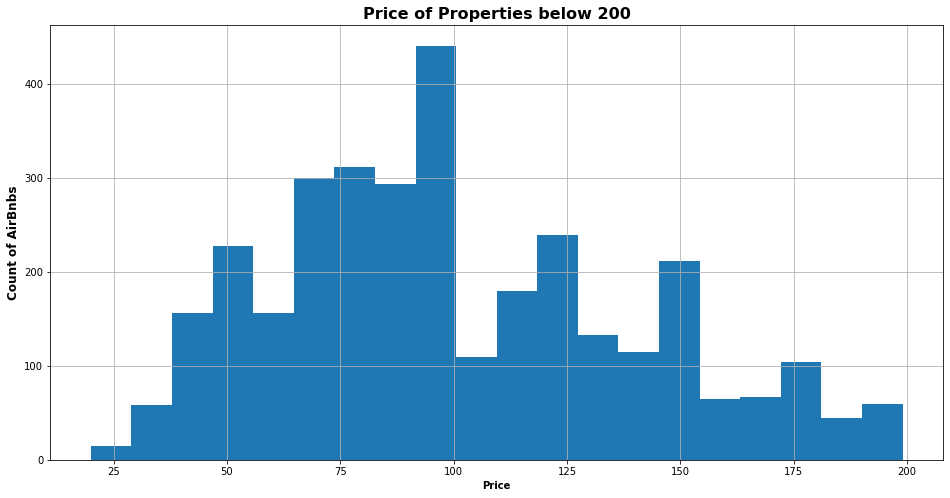

In [29]:
# breakdown to check the listings below 200 dollars
display_price_chart(listings[listings['price'] < 200],'price' ,'Price of Properties below 200' )
